In [17]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi, Boltzmann

$$ \Gamma_0 = \dfrac{6 \pi \eta_{air} r}{m} \dfrac{0.619}{0.619 + K_n} (1+ c_k)$$ 
*(Li et al. 2011 - https://arxiv.org/pdf/1101.1283.pdf)*

Where:

- $\eta_{air}$ is the viscosity of air
- $r$ is the radius of the silica nanoparticles
- $m$ is the mass of the silica nanoparticles
- $K_n$ is the Knudsen number $\dfrac{s}{r}$ where $s$ is the mean free path of the air particles
- $c_k$ is a small positive function of $K_n$ which takes the form $(0.31K_n)/(0.785+1.152K_n+K_n^2)$

The mean free path is dependant upon the pressure of the system. The mathematical
form the mean free path, is dependant upon whether the particles under study are con- sidered to be hard like spheres colliding or as “soft” spheres following Lennard-Jones Potential. In this case assuming the gas particles to be hard spheres yields the following form, $$s = \dfrac{k_B T_0}{ \sqrt{2} π d_{gas}^2 P_{gas}} $$

*(Muddassar - Thesis - Cooling and Squeezing in Levitated Optomechanics 2016)*

Where $d_{gas}$ is the diameter of the gas particles, $T_0$ is the temperature and $P_{gas}$ is the pressure of the gas in pascals1.

Where:

- $d_{gas}$ is the diameter |of the gas particles
- $T_0$ is the temperature of the gas
- $P_{gas}$ is the pressure of the gas

In [57]:
# constants
k_B = Boltzmann
eta_air = 18.27e-6 # Pa # (J.T.R.Watson (1995)).
d_gas = 0.372e-9 #m #(Sone (2007)), ρSiO2
rho_SiO2 = 2200 # #kg/m^3 - could be 2650 ??????????

T0 = 300


$$s = \dfrac{k_B T_0}{ \sqrt{2} π d_{gas}^2 P_{gas}} $$

*(Muddassar - Thesis - Cooling and Squeezing in Levitated Optomechanics 2016)*

In [58]:
def mfp(P_gas):
    mfp_val = k_B*T0/(2**0.5*pi*d_gas**2*P_gas)
    return mfp_val

Alternativity one can use:

$$ s = \dfrac{\eta_{air}}{P_{gas}} \sqrt{\dfrac{\pi k_B T_0}{2m}} $$

Where
- $\eta_{air}$ is the viscosity of air
- $m$ is the molecualar mass of air
- $T_0$ is the temperature of the gas
- $P_{gas}$ is the pressure of the gas

molecular mass of air is $28.97 g/mol$ and the number of molecules in a mole is Avogadro's Number $6.0221409e^{23}$ therefore we get the molecular mass of air to be $4.81e^{-26} Kg$

In [59]:
m_gas = 4.81e-26

In [60]:
def mfp_2(P_gas): 
    mfp_val = eta_air/P_gas * (pi*k_B*T0/(2*m_gas))**0.5
    return mfp_val

In [61]:
s = mfp(300) # 3mbar = 300 Pascals
print(s)

2.2455999057589032e-05


In [62]:
s2 = mfp_2(300) # 3mbar = 300 Pascals
print(s2)

2.2397878589354806e-05


In [44]:
def Gamma_env(radius, Pressure_mbar):
    mass = rho_SiO2 * 4/3*pi*radius**3
    Pressure_pascals = 100*Pressure_mbar
    s = mfp(Pressure_pascals)
    K_n = s/radius
    c_K = 0.31*K_n/(0.785 + 1.152*K_n + K_n**2)
    Gamma_0 = 6*pi*eta_air*radius/mass * 0.619/(0.619 + K_n) * (1+c_K)
    return Gamma_0

In [45]:
Gamma_env(50e-9, 3)

20588.152896251482

Muddassar and Gieseler's simplified formula for the environmental damping is:

$$ \Gamma_0 = 0.619 \dfrac{9 \pi}{\sqrt{2}} \dfrac{\eta_{air}d_{gas}^2}{\rho_{SiO_2} k_B T_0} \dfrac{P_{gas}}{r}$$

Where:

- $\eta_{air}$ is the viscosity of air
- $d_{gas}$ is the diameter of the gas particles
- $\rho_{SiO_2}$ is the density of the silica nanoparticles
- $r$ is the radius of the silica nanoparticles
- $T_0$ is the temperature of the gas
- $P_{gas}$ is the pressure of the gas

In [413]:
def Gamma_env_simple(radius, Pressure_mbar):
    Pressure_pascals = 100*Pressure_mbar
    #Gamma_0 = 0.619*9*pi*eta_air*d_gas**2*Pressure_pascals/(2**0.5*rho_SiO2*k_B*T0*radius)
    Gamma_0 = 0.619*9*pi*eta_air*d_gas**2*Pressure_pascals/(2**0.5*rho_SiO2*k_B*T0*radius)
    return Gamma_0

In [414]:
Gamma_env_simple(50e-9, 3)

20602.344437504566

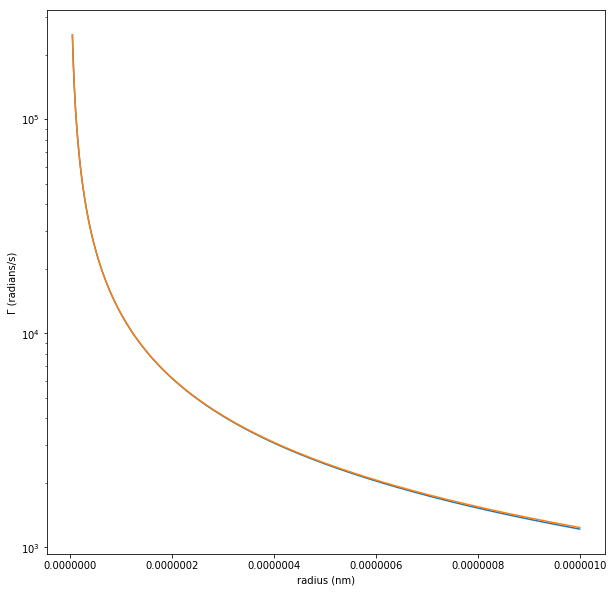

In [415]:
r = np.linspace(5e-9, 1000e-9, 1000)

plt.figure(figsize=[10, 10])
plt.semilogy(r, Gamma_env(r, 3.6))
plt.semilogy(r, Gamma_env_simple(r, 3.6))
plt.xlabel("radius (nm)")
plt.ylabel("Γ (radians/s)")
plt.show()

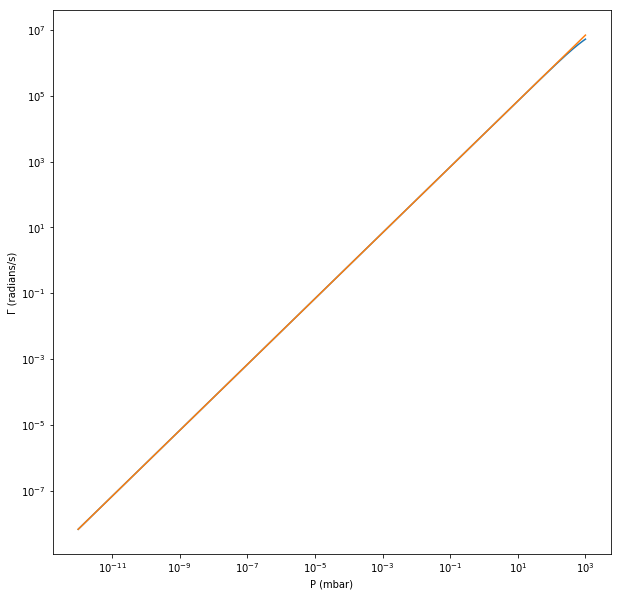

In [416]:
r = 50e-9
P = np.linspace(1e-12, 1000, 1000)

plt.figure(figsize=[10, 10])
plt.loglog(P, Gamma_env(r, P))
plt.loglog(P, Gamma_env_simple(r, P))
plt.xlabel("P (mbar)")
plt.ylabel("Γ (radians/s)")
plt.show()

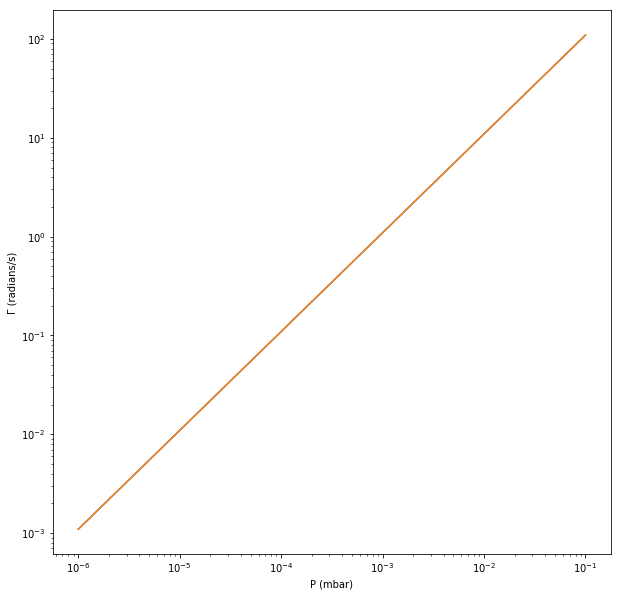

In [417]:
r = 50e-9
P = np.linspace(1e-6, 1e-1, 1000)

plt.figure(figsize=[10, 10])
plt.loglog(P, Gamma_env(r, P)/(2*pi))
plt.loglog(P, Gamma_env_simple(r, P)/(2*pi))
plt.xlabel("P (mbar)")
plt.ylabel("Γ (radians/s)")
plt.show()

This doesn't match the graph in the cooling paper (*Controlling the Motion of a Nanoparticle Trapped in Vacuum - ArXiv:1603.02917*) and doesn't have any frequency dependance - we see different values for different freqs.